# Social synchronization of conditioned fear in mice requires ventral hippocampus input to amygdala
Running title: Emotional synchronization in mice<BR>
Wataru Ito*, Alexei Morozov*


# Statistical Analyses of Freezing Synchrony
This document describes the codes for the statistical analyses in the manuscript.

# Set up DABEST

We used **DABEST** (Data Analysis with Bootstrap-coupled ESTimation) to compute the confidence intervals and make the graphs. Please refer the paper for details, "Moving beyond P values: data analysis with estimation graphics".
https://www.nature.com/articles/s41592-019-0470-3

**Other links for DABEST:**<BR>
1. DABEST document main page (including tutorials)<BR>
https://acclab.github.io/DABEST-python-docs/index.html<BR>
2. GitHub: ACCLAB/DABEST-python<BR>
https://github.com/ACCLAB/DABEST-python<BR>
3. An article in OpenBehavior: "DABEST and permuco"<BR>
https://edspace.american.edu/openbehavior/project/dabest-and-permuco/<BR>

#### 1. Open the Anaconda prompt and follow the sequence below.
Activate the conda environment created in the "python_codes_in_manuscript.ipynb", install dabest package via pip.

```python
# Select the env you created in the "python_codes_in_manuscript.ipynb"
conda activate jl2
pip install --upgrade dabest
```

#### 2. In the opened Anaconda prompt   
1. Change the current directory into the `Codes_in_Emotional_sync_Ito_et_al-main` folder.
2. Start Jupyter Lab.
    
```python
jupyter lab statistical_analyses.ipynb
```

Follow the cells in the opened notebook. Execution of each cell takes less than a couple of second. 

---
# Load DABEST

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import dabest

print("We're using DABEST v{}".format(dabest.__version__))

We're using DABEST v0.3.1


---
# Fig.1D

In [2]:
data_file = 'data_for_statistical_analyses.xlsx'
# Specify the Worksheet Tabs in the Excel file. From left to right, the number start from 0.
sheet_number = 0

In [3]:
synch_figures =  pd.read_excel(data_file,
                              sheet_name=sheet_number,
                              header=0,
                              index_col=False,
                              keep_default_na=True
                              )
synch_figures

,males_visible,females_visiblr,males_IR,females_IR
0,3.195655,0.770834,-0.465274,2.184694
1,2.423710,1.596709,1.772781,-0.744146
2,2.715654,1.921615,2.247868,0.485514
3,3.158930,0.151802,-0.388171,1.328554
4,2.069881,0.975387,-0.565355,-0.094647
5,3.344061,-1.150091,-0.170084,1.726250
6,0.915141,1.754925,-0.127953,-0.798594
7,3.081203,0.241169,-0.843152,-0.254499
8,1.142740,1.903826,0.168659,2.255607
9,1.784096,-0.528802,-0.604394,0.407547


In [4]:
two_groups_unpaired = dabest.load(synch_figures, idx=("males_visible", "females_visiblr"), resamples=5000)

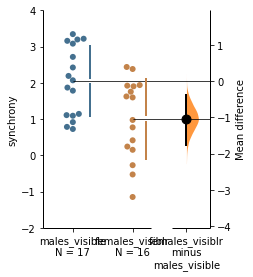

In [5]:
from matplotlib import pyplot as plt
f, axx = plt.subplots(figsize=(3,4))
two_groups_unpaired.mean_diff.plot(ax=axx, group_summaries='mean_sd',swarm_ylim=(-2, 4), swarm_label="synchrony", float_contrast=True);
plt.savefig("fig1d1.eps", format='eps', dpi=1000)

In [6]:
two_groups_unpaired = dabest.load(synch_figures, idx=("males_IR","females_IR"), resamples=5000)

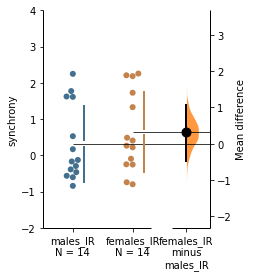

In [7]:
from matplotlib import pyplot as plt
f, axx = plt.subplots(figsize=(3,4))
two_groups_unpaired.mean_diff.plot(ax=axx, group_summaries='mean_sd',swarm_ylim=(-2, 4), swarm_label="synchrony", float_contrast=True);
plt.savefig("fig1d2.eps", format='eps', dpi=1000)

---
# Fig.2C

In [8]:
data_file = 'data_for_statistical_analyses.xlsx'
# Specify the Worksheet Tabs in the Excel file. From left to right, the number start from 0.
sheet_number = 1

In [9]:
synch_figures =  pd.read_excel(data_file,
                              sheet_name=sheet_number,
                              header=0,
                              index_col=False,
                              keep_default_na=True
                              )
synch_figures

,vehicle_PFC,muscimol_PFC
0,-0.059979,-0.982730
1,3.939691,1.590202
2,3.493658,2.922574
3,2.029611,0.949106
4,0.440945,2.454143
5,2.899325,2.429283
6,1.883163,1.490079
7,4.967946,1.870395
8,1.505925,2.084176
9,NaN,2.788442


In [10]:
two_groups_unpaired = dabest.load(synch_figures, idx=("vehicle_PFC", "muscimol_PFC"), resamples=5000)

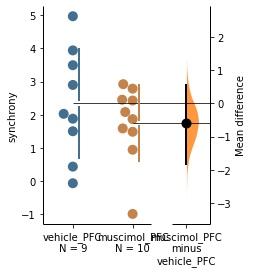

In [11]:
from matplotlib import pyplot as plt
f, axx = plt.subplots(figsize=(3,4))
two_groups_unpaired.mean_diff.plot(raw_marker_size=10, es_marker_size=9,ax=axx, group_summaries='mean_sd', swarm_label="synchrony", float_contrast=True);
plt.savefig("fig2c.eps", format='eps', dpi=1000)

---
# Fig.2F

In [12]:
data_file = 'data_for_statistical_analyses.xlsx'
# Specify the Worksheet Tabs in the Excel file. From left to right, the number start from 0.
sheet_number = 2

In [13]:
synch_figures =  pd.read_excel(data_file,
                              sheet_name=sheet_number,
                              header=0,
                              index_col=False,
                              keep_default_na=True
                              )
synch_figures

,vehicle_dHPC,muscimol_dHPC
0,3.439591,3.595042
1,1.540554,1.769244
2,5.386744,4.022865
3,1.428948,-0.249019
4,1.900733,1.057256
5,1.253172,1.434922
6,0.825874,0.668213
7,1.832757,NaN


In [14]:
two_groups_unpaired = dabest.load(synch_figures, idx=("vehicle_dHPC", "muscimol_dHPC"), resamples=5000)

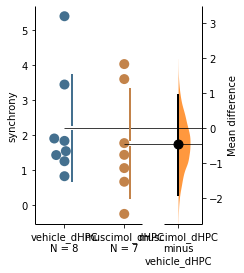

In [15]:
from matplotlib import pyplot as plt
f, axx = plt.subplots(figsize=(3,4))
two_groups_unpaired.mean_diff.plot(raw_marker_size=10, es_marker_size=9,ax=axx, group_summaries='mean_sd', swarm_label="synchrony", float_contrast=True);
plt.savefig("fig2f.eps", format='eps', dpi=1000)

---
# Fig.2I

In [16]:
data_file = 'data_for_statistical_analyses.xlsx'
# Specify the Worksheet Tabs in the Excel file. From left to right, the number start from 0.
sheet_number = 3

In [17]:
synch_figures =  pd.read_excel(data_file,
                              sheet_name=sheet_number,
                              header=0,
                              index_col=False,
                              keep_default_na=True
                              )
synch_figures

,vehicle_vHPC,muscimol_vHPC
0,1.684186,1.007815
1,1.820251,-0.919060
2,1.788796,1.137708
3,1.099301,1.179764
4,2.607199,0.802585
5,1.374311,-1.007064
6,0.178715,0.503479
7,2.553736,-0.697222


In [18]:
two_groups_unpaired = dabest.load(synch_figures, idx=("vehicle_vHPC", "muscimol_vHPC"), resamples=5000)

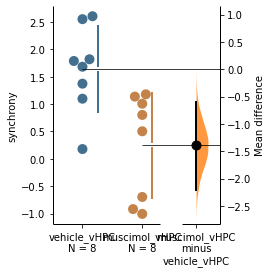

In [19]:
from matplotlib import pyplot as plt
f, axx = plt.subplots(figsize=(3,4))
two_groups_unpaired.mean_diff.plot(raw_marker_size=10, es_marker_size=9,ax=axx, group_summaries='mean_sd',swarm_label="synchrony", float_contrast=True);
plt.savefig("fig2i.eps", format='eps', dpi=1000)

---
# Fig.3D upper

In [20]:
data_file = 'data_for_statistical_analyses.xlsx'
# Specify the Worksheet Tabs in the Excel file. From left to right, the number start from 0.
sheet_number = 4

In [21]:
synch_figures =  pd.read_excel(data_file,
                              sheet_name=sheet_number,
                              header=0,
                              index_col=False,
                              keep_default_na=True
                              )
synch_figures

,vehicle,CNO,ID
0,2.745036,-0.871509,1
1,1.873451,0.894894,2
2,1.900466,0.346963,3
3,1.506478,0.786214,4
4,4.663438,2.360864,5
5,0.613709,3.046542,6
6,1.501024,0.573216,7
7,0.842473,-0.533173,8
8,1.716206,0.120765,9
9,2.976541,1.467185,10


In [22]:
two_groups_paired = dabest.load(synch_figures, idx=("vehicle", "CNO"), paired=True,id_col="ID",resamples=5000)

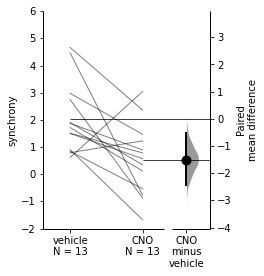

In [23]:
from matplotlib import pyplot as plt
f, axx = plt.subplots(figsize=(3,4))
two_groups_paired.mean_diff.plot(ax=axx, group_summaries='mean_sd',swarm_ylim=(-2, 6),swarm_label="synchrony", float_contrast=True)
plt.savefig("fig3d_up.eps", format='eps', dpi=1000)

---
# Fig.3D lower

In [24]:
data_file = 'data_for_statistical_analyses.xlsx'
# Specify the Worksheet Tabs in the Excel file. From left to right, the number start from 0.
sheet_number = 5

In [25]:
synch_figures =  pd.read_excel(data_file,
                              sheet_name=sheet_number,
                              header=0,
                              index_col=False,
                              keep_default_na=True
                              )
synch_figures

,vehicle,CNO,ID
0,1.078762,1.802431,1
1,2.503823,0.608026,2
2,0.627062,1.001520,3
3,1.662656,1.280156,4
4,2.122308,1.645427,5
5,1.220100,2.732651,6
6,2.026069,1.218580,7
7,1.899240,2.846697,8
8,1.317482,0.274185,9
9,3.611523,2.209836,10


In [26]:
two_groups_paired = dabest.load(synch_figures, idx=("vehicle", "CNO"), paired=True,id_col="ID",resamples=5000)

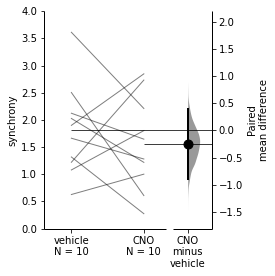

In [27]:
f, axx = plt.subplots(figsize=(3,4))
two_groups_paired.mean_diff.plot(ax=axx, group_summaries='mean_sd',swarm_ylim=(0, 4), swarm_label="synchrony", float_contrast=True)
plt.savefig("fig3d_low.eps", format='eps', dpi=1000)

---
All figures are exported as eps files and assembled in Adobe Illustrator.